In [976]:
import numpy as np
import pandas as pd
import datetime as dt
import holidays

In [977]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [978]:
fs_con = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\Flight Schedule w Concourse-Copy1.csv')
fs_con.head()

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
0,98394474,2021-01-02,2021-01-02T11:25:00.000Z,2021-01-02T11:15:00.000Z,2021-01-02T11:15:00.000Z,1900-01-01T11:25:00.000Z,1900-01-01T11:15:00.000Z,2021010211,1900-01-01T11:15:00.000Z,1900-01-01T11:25:00.000Z,6465,77L,404,AIC,100,116,EWR,DEL,116,100,-1,3,B,B,Departure,106,International,NaN,J,All Passenger Flights,238,0.744576,177,7323,820,1,1,AI,Air India,10,404,1900-01-01T11:15:00.000Z,NaN,NaN,Concourse B-3
1,98394693,2021-01-02,2021-01-02T19:10:00.000Z,2021-01-02T15:10:00.000Z,2021-01-02T15:10:00.000Z,1900-01-01T19:10:00.000Z,1900-01-01T15:10:00.000Z,2021010215,1900-01-01T15:10:00.000Z,1900-01-01T19:10:00.000Z,6392,319,677,AVA,298,116,EWR,SAL,116,298,-1,NaN,B,B,Departure,399,International,NaN,J,All Passenger Flights,120,0.836882,100,2067,300,1,1,TA,Taca International Airlines,10,6105,1900-01-01T15:10:00.000Z,NaN,NaN,Hard Stand
2,98394899,2021-01-01,2021-01-01T08:50:00.000Z,2021-01-01T19:30:00.000Z,2021-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010119,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,101,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,440,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
3,98394900,2021-01-02,2021-01-02T08:50:00.000Z,2021-01-02T19:30:00.000Z,2021-01-02T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010219,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,101,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,440,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
4,98394985,2021-01-01,2021-01-01T11:00:00.000Z,2021-01-01T21:50:00.000Z,2021-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,1900-01-01T21:50:00.000Z,2021010121,1900-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,6395,321,6110,DJT,254,116,EWR,ORY,116,254,-1,4,B,B,Departure,103,International,NaN,J,All Passenger Flights,76,0.336623,25,3648,430,1,1,B0,La Compagnie,10,6110,1900-01-01T21:50:00.000Z,NaN,NaN,Concourse B-3


In [979]:
fs_con.shape

(28308, 45)

In [980]:
fs_con.dtypes

Id                               int64
Flight Date                     object
Flight Arrving Date Time        object
Flight Departing Date Time      object
Flight Date Time                object
Flight Arriving Time            object
Flight Departing Time           object
Date Hour Numeric                int64
PA Time                         object
Non-PA Time                     object
Aircraft Id                      int64
Aircraft Code                   object
Airline Id                       int64
ICAO Airline                    object
Arriving from Airport Id         int64
Departing to Airport Id          int64
Dep Airport Code                object
Arr Airport Code                object
Context Airport Id               int64
Non-Context Airport Id           int64
State Id                         int64
Arr Terminal                    object
Dep Terminal                    object
Context Terminal                object
Flight Direction                object
Flight No                

In [981]:
#filter for B concourses
fs = fs_con[fs_con['Departure Concourse'].isin(['Concourse B-1', 'Concourse B-2','Concourse B-3'])]

In [982]:
#remove the load factor columns - these were not merged properly in the original dataset
fs = fs.drop(['Seats',	'Load Factor',	'Estimated Passenger','nonpaxratio','TSALoadFactor'],axis=1)

In [983]:
fs['Flight Type'].value_counts()

All Passenger Flights    26023
Name: Flight Type, dtype: int64

In [984]:
fs = fs.replace({'Departure Concourse':{'Concourse B-1':'B1','Concourse B-2':'B2','Concourse B-3':'B3'}})

In [985]:
start, stop = 0, 10

fs['Date'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [986]:
start, stop = 11, 16

fs['Time'] = fs['Flight Departing Date Time'].str.slice(start, stop)

In [987]:
fs['DT_sched'] = fs['Date']+' '+fs['Time'].astype(str)
fs['DT_sched'] = pd.to_datetime(fs['DT_sched'], format='%Y-%m-%d %H:%M:%S')

In [988]:
fs['Hour'] = fs['DT_sched'].dt.hour

In [989]:
fs = fs[['Id', 'Aircraft Id', 'Aircraft Code', 'Airline Id',
       'ICAO Airline', 'Arr Airport Code', 'Dep Terminal',
       'Flight No',
       'International Domestic', 
       'Flight Distance', 'Flight Duration', 'Operating Airline Code',
       'Operating Airline Name', 'Operating Airline Id',
       'Flight Time', 'Departure Concourse',
       'Date', 'Time', 'DT_sched', 'Hour']]

In [990]:
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,Time,DT_sched,Hour
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,11:15,2021-01-02 11:15:00,11
2,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,19:30,2021-01-01 19:30:00,19
3,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,19:30,2021-01-02 19:30:00,19
4,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,21:50,2021-01-01 21:50:00,21
5,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,21:50,2021-01-02 21:50:00,21


In [991]:
fs['month'] = fs['DT_sched'].dt.month
fs['year'] = fs['DT_sched'].dt.year

In [992]:
#filter for 2021 only
fs = fs[fs.year == 2021]

## Group flight times into time of day and day of week

In [993]:
morning = [6,7,8,9,10,11,12]
afternoon = [13,14,15,16,17]
evening = [18,19,20,21,22]
overnight = [23,0,1,2,3,4,5]

In [ ]:
lsthour = []
for s in fs['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [994]:
fs['Time Category'] = lsthour

In [995]:
fs['DOW'] = fs['DT_sched'].dt.weekday
fs['DOW_l'] = fs['DOW'].copy()
fs["DOW_l"].replace({0: "Monday", 1: "Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)

In [996]:
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,Time,DT_sched,Hour,month,year,Time Category,DOW,DOW_l
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,11:15,2021-01-02 11:15:00,11,1,2021,Morning,5,Saturday
2,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,19:30,2021-01-01 19:30:00,19,1,2021,Evening,4,Friday
3,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,19:30,2021-01-02 19:30:00,19,1,2021,Evening,5,Saturday
4,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,21:50,2021-01-01 21:50:00,21,1,2021,Evening,4,Friday
5,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,21:50,2021-01-02 21:50:00,21,1,2021,Evening,5,Saturday


## Add new column for Holidays and holiday weekends

In [997]:
#import US holidays (for NY and NJ) from the holidays library
hds = holidays.US(subdiv = 'NY',years = 2021) + holidays.US(subdiv = 'NJ',years = 2021)

In [998]:
for date, name in sorted(hds.items()):
    print(date, name, date.weekday())

2021-01-01 New Year's Day 4
2021-01-18 Martin Luther King Jr. Day 0
2021-02-12 Lincoln's Birthday 4
2021-02-15 Washington's Birthday 0
2021-04-02 Good Friday 4
2021-05-31 Memorial Day 0
2021-06-18 Juneteenth National Independence Day (Observed) 4
2021-06-19 Juneteenth National Independence Day 5
2021-07-04 Independence Day 6
2021-07-05 Independence Day (Observed) 0
2021-09-06 Labor Day 0
2021-10-11 Columbus Day 0
2021-11-02 Election Day 1
2021-11-11 Veterans Day 3
2021-11-25 Thanksgiving 3
2021-12-24 Christmas Day (Observed) 4
2021-12-25 Christmas Day 5
2021-12-31 New Year's Day (Observed) 4


In [999]:
#if the departure date is in the list of holidays, mark as a 1
fs['holiday'] = 0
for i in fs.index:
    if fs.loc[i,'DT_sched'] in hds:
        fs.loc[i,'holiday'] = 1

In [1000]:
#days surrounding the holidays also tend to have higher demand. Identify the surrounding days.
fl_hds = []
for date, name in sorted(hds.items()):
    if (name == 'Christmas Day') | (name == 'Thanksgiving') | (name == "New Year's Day"):
    # for the big holidays, we would expect to see increased travel on the 3 days before and after
        fl_hds.append(date - dt.timedelta(1))
        fl_hds.append(date - dt.timedelta(2))
        fl_hds.append(date - dt.timedelta(3))
        fl_hds.append(date + dt.timedelta(1))
        fl_hds.append(date + dt.timedelta(2))
        fl_hds.append(date + dt.timedelta(3))
    elif date.weekday() == 0:
    # for Monday holidays, we would expect to see increased travel on the Friday, Saturday, and Sunday prior
        fl_hds.append(date - dt.timedelta(1))
        fl_hds.append(date - dt.timedelta(2))
        fl_hds.append(date - dt.timedelta(3))
    elif date.weekday() == 4:
    # for Friday holidays, we would expect to see increased travel on the Saturday and Sunday after
        fl_hds.append(date + dt.timedelta(1))
        fl_hds.append(date + dt.timedelta(2))
    

In [1001]:
#if the departure date is in the list of days surrounding holidays, also mark as a 1
for i in fs.index:
    if fs.loc[i,'DT_sched'].date() in fl_hds:
        fs.loc[i,'holiday'] = 1

## Merge aircraft codes for ICAO and BTS

In [1002]:
# I had to create this lookup table manually, referring to the following sources:
# 1) the T-100 data itself, which has the Aircraft Type Desc_1
# 2) the BTS website provides this lookup table for BTS Aircraft Type Desc_2 and the BTS Aircraft Type Code: https://transtats.bts.gov/Download_Lookup.asp?Y11x72=Y_NVePeNSg_glcR
# 3) https://en.wikipedia.org/wiki/List_of_aircraft_type_designators
# 4) https://www.avcodes.co.uk/acrtypes.asp
# 5) The FAA Airplane Design Groups (ADG), which is used to classify plane size based on wingspan and height. It is a good enough approximation for seat capacity categories. https://www.faa.gov/airports/engineering/aircraft_char_database/
# Note that there is not always a 1-to-1 match, and a few of the BTS values did not correspond perfectly with the ICAO/IATA codes.
aircraft_codes = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\LookupTables\Aircraft_Lookup.csv')
aircraft_codes.head()

,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
0,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III
1,AIRBUS INDUSTRIE A220-300,A220-300 BD-500-1A11,724,BCS3,223,III
2,AIRBUS INDUSTRIE A300-600/R/CF/RCF,Airbus Industrie A300-600/R/CF/RCF,691,A306,AB6,IV
3,AIRBUS INDUSTRIE A300-B2,Airbus Industrie A300-B2,695,A30B,AB4,IV
4,AIRBUS INDUSTRIE A319,Airbus Industrie A319,698,A319,319,III


In [1003]:
fs = pd.merge(left=fs, right=aircraft_codes,how='left',left_on='Aircraft Code', right_on = 'IATA Aircraft Code')
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,Time,DT_sched,Hour,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,11:15,2021-01-02 11:15:00,11,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,19:30,2021-01-01 19:30:00,19,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III
2,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,19:30,2021-01-02 19:30:00,19,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III
3,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,21:50,2021-01-01 21:50:00,21,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III
4,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,21:50,2021-01-02 21:50:00,21,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III


In [1004]:
# merge worked well - no N/As
fs['BTS Aircraft Type Code'].isna().sum()

0

## Merge destination region

In [1005]:
# the destination data is available at https://ourairports.com/data/
# the regions were manually assigned based on Gabe's discretion. Domestic flights are divided into northeast, southeast, midwest, plains, and west coast/pacific.
# Canada is its own region. Central America and Caribbean were grouped together with South America. Otherwise, the region corresponds to the continent.

airport_lookup = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\LookupTables\airport-codes.csv')
airport_lookup.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,US State,US Region,Region
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",PA,Northeast,USA-Northeast
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",KS,Plains,USA-Plains
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",AK,Pacific West,USA-Pacific West
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",AL,Southeast,USA-Southeast
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",AR,Southeast,USA-Southeast


In [1006]:
fs = pd.merge(fs, airport_lookup[['iata_code','Region']],left_on = 'Arr Airport Code',right_on = 'iata_code', how='left')

## Merge airline category

In [1007]:
# Airlines were grouped into low-cost carriers (LC) and traditional carriers (TR)
# the data source for this classification is based on the ICAO List of Low-Cost-Carriers: https://www.icao.int/sustainability/documents/lcc-list.pdf
# A few manual adjustments were made for known LCCs, e.g. French Bee, that is not in the ICAO list.

al_lookup = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\LookupTables\Airlines Mapping.csv')
al_lookup.head()

,Marketing Airline Desc,Marketing Airline IATA Code,Marketing Airline ICAO Code,Marketing Airline Country,Type
0,ABC Aerolineas,4O,AIJ,Mexico,LC
1,Aer Lingus,EI,EIN,Ireland,TR
2,Aeroenlaces Nacionales,VB,VIV,Mexico,LC
3,Aeroflot Russian Airlines,SU,AFL,Russia,TR
4,Aerolineas Argentinas,AR,ARG,Argentina,TR


In [1008]:
fs = pd.merge(fs, al_lookup[['Marketing Airline IATA Code','Marketing Airline ICAO Code','Type']], how= 'left', left_on = 'ICAO Airline', right_on = 'Marketing Airline ICAO Code').rename({'Marketing Airline IATA Code':'airline_iata','Type':'airline_type','Marketing Airline ICAO Code':'airline_icao'},axis=1)

In [1009]:
fs.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,Time,DT_sched,Hour,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,11:15,2021-01-02 11:15:00,11,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V,DEL,Asia,AI,AIC,TR
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,19:30,2021-01-01 19:30:00,19,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR
2,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,19:30,2021-01-02 19:30:00,19,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR
3,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,21:50,2021-01-01 21:50:00,21,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR
4,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,21:50,2021-01-02 21:50:00,21,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR


## T-100 data download from BTS portal

In [1010]:
#downloaded from https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FMG&QO_fu146_anzr=Nv4+Pn44vr45
t1 = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\DL_SelectFields\T_T100_SEGMENT_ALL_CARRIER.csv')
t1.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE
0,0.0,1.0,0.0,0.0,740.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,12478,1247805,31703,JFK,"New York, NY",NY,36.0,New York,US,United States,22,8,821,2,2021,3,9,G,DF
1,0.0,3.0,0.0,0.0,1744.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6.0,California,US,United States,91,8,821,2,2021,3,9,G,DF
2,0.0,6.0,0.0,0.0,4243.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,12173,1217305,32134,HNL,"Honolulu, HI",HI,15.0,Hawaii,US,United States,2,8,821,2,2021,3,9,G,DF
3,0.0,4.0,0.0,0.0,801.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,13930,ORD,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,US,United States,74,8,821,2,2021,3,9,G,DF
4,0.0,2.0,0.0,0.0,9201.0,QF,19566,Qantas Airways Ltd.,9802A,I,QF,Qantas Airways Ltd.,0,0,15092,SYD,13930,1393007,30977,ORD,"Chicago, IL",IL,17.0,Illinois,US,United States,41,8,821,2,2021,3,9,G,IF


In [1011]:
# filter for Newark departures only
t1 = t1[t1['ORIGIN'] == 'EWR']

t1.shape

(7128, 35)

In [1012]:
# filter out freight-only flights, flights with 0 seats or 0 passengers

#AIRCRAFT_CONFIG refers to cargo/passengers. Passenger flights have config == 1 or 3
t1 = t1[(t1.AIRCRAFT_CONFIG == 1) | (t1.AIRCRAFT_CONFIG == 3)]

t1 = t1[t1.SEATS > 0]
t1 = t1[t1.PASSENGERS > 0]

t1.shape

(6187, 35)

In [1014]:
# convert t100 aircraft_type field to a string to match the corresponding data type in flight schedule
t1['AIRCRAFT_TYPE'] = t1['AIRCRAFT_TYPE'].astype(str)

In [1015]:
# merge in the aircraft lookup codes
t1 = pd.merge(left=t1,right=aircraft_codes,left_on = 'AIRCRAFT_TYPE',right_on = 'BTS Aircraft Type Code',how='left')

In [1019]:
# analysis showed that airlines interchange similar aircraft sometimes.
# In aggregate, the total reported flights from EWR to a given destination, on a given airline, in a given month was pretty similar to the scheduled flights.
# However, instead of flying half on aircraft A and half on aircraft B, as scheduled, they actually flew 90% on aircraft A and only 10% on aircraft B, where A and B are very similar types of aircraft
# Therefore, we will group T100 data by the Airplane Design Group (ADG) before merging

t1g = t1[['DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS',
       'DISTANCE', 'CARRIER', 'CARRIER_NAME',
       'DEST',
       'DEST_CITY_NAME', 'DEST_COUNTRY_NAME', 
       'YEAR', 'MONTH', 'ADG']].groupby(by=['CARRIER','DEST','YEAR','MONTH','ADG'],as_index=False).agg({
              'DEPARTURES_PERFORMED':'sum','SEATS':'sum','PASSENGERS':'sum','DISTANCE':'mean','CARRIER_NAME':'min','DEST_CITY_NAME':'min','DEST_COUNTRY_NAME':'min'})
t1g

,CARRIER,DEST,YEAR,MONTH,ADG,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME
0,04Q,ACK,2021,4,II,1.0,8.0,2.0,218.0,Tradewind Aviation,"Nantucket, MA",United States
1,04Q,HTO,2021,3,II,1.0,8.0,3.0,102.0,Tradewind Aviation,"East Hampton, NY",United States
2,04Q,LEB,2021,12,II,2.0,16.0,3.0,224.0,Tradewind Aviation,"Lebanon-Hanover, NH",United States
3,04Q,MVY,2021,7,II,1.0,8.0,3.0,192.0,Tradewind Aviation,"Martha's Vineyard, MA",United States
4,04Q,PGV,2021,12,II,1.0,8.0,2.0,390.0,Tradewind Aviation,"Greenville, NC",United States
...,...,...,...,...,...,...,...,...,...,...,...,...
3439,YX,YUL,2021,12,III,49.0,3580.0,2579.0,331.0,Republic Airline,"Montreal, Canada",Canada
3440,YX,YYZ,2021,9,III,23.0,1742.0,1398.0,348.0,Republic Airline,"Toronto, Canada",Canada
3441,YX,YYZ,2021,10,III,31.0,2332.0,1856.0,348.0,Republic Airline,"Toronto, Canada",Canada
3442,YX,YYZ,2021,11,III,27.0,2028.0,1380.0,348.0,Republic Airline,"Toronto, Canada",Canada


In [1020]:
# create columns for seats per flight, monthly average pax per flight, and average load factor
t1g['seatsxfl'] = t1g['SEATS'] / t1g['DEPARTURES_PERFORMED']
t1g['paxxfl_mavg'] = t1g['PASSENGERS'] / t1g['DEPARTURES_PERFORMED']
t1g['lf_mavg'] = t1g['PASSENGERS'] / t1g['SEATS']

## Merge the T100 data and assess

In [1021]:
# merge the load factor data into the flight schedule data
mg = pd.merge(left=fs, right = t1g, left_on = ['Operating Airline Code','year','month','Arr Airport Code','ADG'],right_on = ['CARRIER','YEAR','MONTH','DEST','ADG'],how='left',indicator=True)
mg._merge.value_counts()

both          17945
left_only      1885
right_only        0
Name: _merge, dtype: int64

In [1032]:
mg.head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,Time,DT_sched,Hour,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type,CARRIER,DEST,YEAR,MONTH,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME,seatsxfl,paxxfl_mavg,lf_mavg,_merge
0,98394474,6465,77L,404,AIC,DEL,B,106,International,7323,820,AI,Air India,404,1900-01-01T11:15:00.000Z,B3,2021-01-02,11:15,2021-01-02 11:15:00,11,1,2021,Morning,5,Saturday,1,BOEING 777-200/200LR,Boeing 777-200ER/200LR/233LR,627,B772,77L,V,DEL,Asia,AI,AIC,TR,AI,DEL,2021.0,1.0,37.0,11718.0,7258.0,7324.0,National Aviation Company of India Limited d/b...,"Delhi, India",India,316.702703,196.162162,0.619389,both
1,98394899,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-01,19:30,2021-01-01 19:30:00,19,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,B0,ORY,2021.0,1.0,4.0,304.0,32.0,3648.0,Dreamjet SAS Dba La Compagnie,"Paris, France",France,76.000000,8.000000,0.105263,both
2,98394900,6395,321,6110,DJT,ORY,B,101,International,3648,440,B0,La Compagnie,6110,1900-01-01T19:30:00.000Z,B2,2021-01-02,19:30,2021-01-02 19:30:00,19,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,B0,ORY,2021.0,1.0,4.0,304.0,32.0,3648.0,Dreamjet SAS Dba La Compagnie,"Paris, France",France,76.000000,8.000000,0.105263,both
3,98394985,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-01,21:50,2021-01-01 21:50:00,21,1,2021,Evening,4,Friday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,B0,ORY,2021.0,1.0,4.0,304.0,32.0,3648.0,Dreamjet SAS Dba La Compagnie,"Paris, France",France,76.000000,8.000000,0.105263,both
4,98394986,6395,321,6110,DJT,ORY,B,103,International,3648,430,B0,La Compagnie,6110,1900-01-01T21:50:00.000Z,B3,2021-01-02,21:50,2021-01-02 21:50:00,21,1,2021,Evening,5,Saturday,1,AIRBUS INDUSTRIE A321,Airbus Industrie A321-200n,721,A321,321,III,ORY,Europe,B0,DJT,TR,B0,ORY,2021.0,1.0,4.0,304.0,32.0,3648.0,Dreamjet SAS Dba La Compagnie,"Paris, France",France,76.000000,8.000000,0.105263,both


In [1033]:
mg.lf_mavg.describe()

count    17945.000000
mean         0.736597
std          0.182635
min          0.052878
25%          0.604088
50%          0.792580
75%          0.878297
max          1.000000
Name: lf_mavg, dtype: float64

<AxesSubplot:>

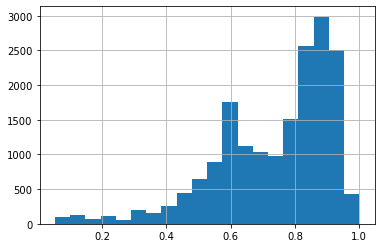

In [1035]:
mg.lf_mavg.hist(bins=20)

In [1036]:
# total number of passengers departing terminal B for 2021. This compares pretty well to the total TSA count of 2.8 million!
mg.paxxfl_mavg.sum()

2231196.761743874

In [1022]:

mg[mg['_merge'] == 'left_only'].head()

,Id,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arr Airport Code,Dep Terminal,Flight No,International Domestic,Flight Distance,Flight Duration,Operating Airline Code,Operating Airline Name,Operating Airline Id,Flight Time,Departure Concourse,Date,Time,DT_sched,Hour,month,year,Time Category,DOW,DOW_l,holiday,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG,iata_code,Region,airline_iata,airline_icao,airline_type,CARRIER,DEST,YEAR,MONTH,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,CARRIER_NAME,DEST_CITY_NAME,DEST_COUNTRY_NAME,seatsxfl,paxxfl_mavg,lf_mavg,_merge
5,98395623,6470,788,404,AIC,BOM,B,144,International,7806,845,AI,Air India,404,1900-01-01T11:45:00.000Z,B3,2021-01-01,11:45,2021-01-01 11:45:00,11,1,2021,Morning,4,Friday,1,BOEING 787-800 DREAMLINER,Boeing B737 Max 800,838,B788,788,V,BOM,Asia,AI,AIC,TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,98396395,6414,359,6298,FBU,ORY,B,721,International,3648,430,BF,French Bee,6298,1900-01-01T23:55:00.000Z,B2,2021-01-01,23:55,2021-01-01 23:55:00,23,1,2021,Overnight,4,Friday,1,AIRBUS INDUSTRIE A350-900,Airbus Industrie A350-900,359,A359,359,V,ORY,Europe,BF,FBU,LC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,98396396,6414,359,6298,FBU,ORY,B,721,International,3648,430,BF,French Bee,6298,1900-01-01T23:55:00.000Z,B2,2021-01-02,23:55,2021-01-02 23:55:00,23,1,2021,Overnight,5,Saturday,1,AIRBUS INDUSTRIE A350-900,Airbus Industrie A350-900,359,A359,359,V,ORY,Europe,BF,FBU,LC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
19,98398627,6389,221,1486,DAL,DTW,B,1476,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T17:59:00.000Z,B1,2021-01-02,17:59,2021-01-02 17:59:00,17,1,2021,Afternoon,5,Saturday,1,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III,DTW,USA-Midwest,DL,DAL,TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,98400167,6389,221,1486,DAL,DTW,B,1646,Domestic,488,117,DL,Delta Air Lines,1486,1900-01-01T06:00:00.000Z,B1,2021-01-01,06:00,2021-01-01 06:00:00,6,1,2021,Morning,4,Friday,1,AIRBUS INDUSTRIE A220-100,Airbus Industrie A330-300,687,BCS1,221,III,DTW,USA-Midwest,DL,DAL,TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [860]:
#for every unique value in each of the merge fields of the flight schedule,
# confirm that the same value exists in the corresponding field of the T100
# compare the number of flights in the flight schedule vs. the number of flights performed according to T100

In [1024]:
fs_gx = fs[['Flight No','Operating Airline Code','year','month','Arr Airport Code','ADG']].groupby(by=['Operating Airline Code','year','month','Arr Airport Code','ADG'],as_index=False).count()
fs_gx

,Operating Airline Code,year,month,Arr Airport Code,ADG,Flight No
0,9E,2021,1,CVG,III,16
1,9E,2021,1,DTW,III,9
2,9E,2021,1,MSP,III,87
3,9E,2021,2,CVG,III,14
4,9E,2021,2,MSP,III,78
...,...,...,...,...,...,...
626,TP,2021,11,LIS,V,32
627,TP,2021,11,OPO,V,10
628,TP,2021,12,LIS,III,42
629,TP,2021,12,LIS,V,33


In [1025]:
t1_gx = t1[['DEPARTURES_PERFORMED','CARRIER','YEAR','MONTH','DEST','ADG']].groupby(by=['CARRIER','YEAR','MONTH','DEST','ADG'],as_index=False).sum()
t1_gx

,CARRIER,YEAR,MONTH,DEST,ADG,DEPARTURES_PERFORMED
0,04Q,2021,3,HTO,II,1.0
1,04Q,2021,4,ACK,II,1.0
2,04Q,2021,7,MVY,II,1.0
3,04Q,2021,7,ZXU,II,1.0
4,04Q,2021,12,LEB,II,2.0
...,...,...,...,...,...,...
3439,YX,2021,12,SYR,III,27.0
3440,YX,2021,12,TPA,III,1.0
3441,YX,2021,12,XNA,III,28.0
3442,YX,2021,12,YUL,III,49.0


In [1026]:
comp = pd.merge(left=fs_gx,right=t1_gx,left_on=['Operating Airline Code','year','month','Arr Airport Code','ADG'], right_on = ['CARRIER','YEAR','MONTH','DEST','ADG'], how = 'left')
comp

,Operating Airline Code,year,month,Arr Airport Code,ADG,Flight No,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED
0,9E,2021,1,CVG,III,16,9E,2021.0,1.0,CVG,16.0
1,9E,2021,1,DTW,III,9,9E,2021.0,1.0,DTW,9.0
2,9E,2021,1,MSP,III,87,9E,2021.0,1.0,MSP,87.0
3,9E,2021,2,CVG,III,14,9E,2021.0,2.0,CVG,12.0
4,9E,2021,2,MSP,III,78,9E,2021.0,2.0,MSP,73.0
...,...,...,...,...,...,...,...,...,...,...,...
626,TP,2021,11,LIS,V,32,TP,2021.0,11.0,LIS,1.0
627,TP,2021,11,OPO,V,10,NaN,NaN,NaN,NaN,NaN
628,TP,2021,12,LIS,III,42,NaN,NaN,NaN,NaN,NaN
629,TP,2021,12,LIS,V,33,TP,2021.0,12.0,LIS,3.0


In [1027]:
comp.DEPARTURES_PERFORMED.fillna(0,inplace=True)

In [1028]:
#percentage difference between number of departures in the flight schedule and T100 data
comp['acc'] = (comp['Flight No'] - comp['DEPARTURES_PERFORMED']) / comp['Flight No']

<AxesSubplot:>

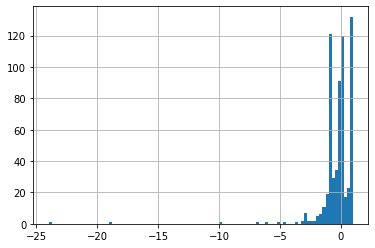

In [1029]:
# a value of zero means that they are perfectly aligned.
# Negative values means that the T100 data reported more flights than the flight schedule. This isn't a big issue, but I'll look at some of the larger negative values.
# The positive values indicate that the T100 data is under-reported compared with FS. In particular, a value of 1 indicates that no flights were reported for that airline-month-destination-aircraft combination.
comp.acc.hist(bins = 100)

In [1030]:
# first let's do a quick check of the negative values, anything less than -`1
comp[comp['acc'] < -1]

,Operating Airline Code,year,month,Arr Airport Code,ADG,Flight No,CARRIER,YEAR,MONTH,DEST,DEPARTURES_PERFORMED,acc
6,9E,2021,3,CVG,III,1,9E,2021.0,3.0,CVG,4.0,-3.000000
41,AI,2021,1,DEL,V,17,AI,2021.0,1.0,DEL,37.0,-1.176471
47,AI,2021,4,DEL,V,16,AI,2021.0,4.0,DEL,34.0,-1.125000
50,AI,2021,6,DEL,V,9,AI,2021.0,6.0,DEL,20.0,-1.222222
53,AI,2021,9,DEL,V,15,AI,2021.0,9.0,DEL,34.0,-1.266667
54,AI,2021,10,DEL,V,17,AI,2021.0,10.0,DEL,35.0,-1.058824
57,AI,2021,12,BOM,V,11,AI,2021.0,12.0,BOM,28.0,-1.545455
58,AI,2021,12,DEL,V,16,AI,2021.0,12.0,DEL,34.0,-1.125000
66,B0,2021,7,ORY,III,17,B0,2021.0,7.0,ORY,120.0,-6.058824
67,B0,2021,8,NCE,III,7,B0,2021.0,8.0,NCE,20.0,-1.857143


In [1031]:
# What's the scale of the potential over-reporting?
print(f"According to FS, there were {comp.loc[comp['acc'] < -1, 'Flight No'].sum()} flights.")
print(f"According to T100, there were {comp.loc[comp['acc'] < -1, 'DEPARTURES_PERFORMED'].sum()} flights.")

According to FS, there were 1492 flights.
According to T100, there were 4884.0 flights.


## Analyzing the merge to inform changes that I will incorporate in the code above.
Note that some of this code will return errors if run after I've incorporated the changes above.

In [966]:
# Look quickly at one example

# In Oct 2021, Frontier reported 13 flights between Newark and Miami (MIA) on aircraft type 722 (A320-200n). According to the flight schedule, there were only 3 such flights.
# In FS, check Frontier flights in Oct 2021 to MIA (regardless of aircraft type)

fs.loc[(fs['Operating Airline Code'] == 'F9') & (fs['iata_code'] == 'MIA') & (fs['month'] == 10),'BTS Aircraft Type Desc_2'].value_counts()

Airbus Industrie A320-100/200    13
Airbus Industrie A320-200n        3
Name: BTS Aircraft Type Desc_2, dtype: int64

In [ ]:
# These aircraft are basically the same, both A320s
# Seems likely that airlines swap out similar aircraft, so maybe using the ADG is better than using the specific aircraft code...

In [971]:
# Indeed, the T100 data shows that Frontier reported a total of 15 flights to Miami (nearly the same as the scheduled 16).
# The aircraft was just swapped - there were actually 13 flights on the A320-200n (vs. 3 in the FS) and only 2 flights on the A320-100/200 (vs. 13 in the FS)
# This would result in a high accuracy for one, and a low accuracy for the other, but if we group by ADG, they will even out and be close to zero.
t1.loc[(t1['CARRIER'] == 'F9') & (t1['DEST'] == 'MIA') & (t1['MONTH'] == 10)]

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE,seatsxfl,paxxfl_mavg,lf_mavg
193893,2.0,2.0,360.0,178.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,694,1,2021,4,10,F,DU,180.0,89.000000,0.494444
294463,13.0,13.0,2418.0,2036.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,722,1,2021,4,10,F,DU,186.0,156.615385,0.842018


In [ ]:
# This supports the idea of grouping by ADG before merging.

In [968]:



# Scheduled Delta EWR-MSP flights in Sept 2021 by aircraft type
fs.loc[(fs['Operating Airline Code'] == 'DL') & (fs['iata_code'] == 'MSP') & (fs['month'] == 10),'BTS Aircraft Type Desc_2'].value_counts()

Airbus Industrie A319            39
Airbus Industrie A320-100/200    20
Airbus Industrie A330-300         1
Name: BTS Aircraft Type Desc_2, dtype: int64

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE,seatsxfl,paxxfl_mavg,lf_mavg
193893,2.0,2.0,360.0,178.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,694,1,2021,4,10,F,DU,180.0,89.000000,0.494444
294463,13.0,13.0,2418.0,2036.0,1085.0,F9,20436,Frontier Airlines Inc.,06460,D,F9,Frontier Airlines Inc.,3,3,11618,EWR,13303,1330303,32467,MIA,"Miami, FL",FL,12.0,Florida,US,United States,33,6,722,1,2021,4,10,F,DU,186.0,156.615385,0.842018


In [970]:
aircraft_codes[(aircraft_codes['BTS Aircraft Type Code'] == '722') | (aircraft_codes['BTS Aircraft Type Code'] == '694')]

,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
5,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,320,III
6,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,32A,III
7,AIRBUS INDUSTRIE A320-200N,Airbus Industrie A320-200n,722,A20N,32N,III


In [ ]:
# remember to check operating vs. marketing airline. Skywest vs Delta on the MSP flights.

In [943]:
aircraft_codes[aircraft_codes['BTS Aircraft Type Code'] == '694']

,BTS Aircraft Type Desc_1,BTS Aircraft Type Desc_2,BTS Aircraft Type Code,ICAO Aircraft Code,IATA Aircraft Code,ADG
5,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,320,III
6,AIRBUS INDUSTRIE A320-100/200,Airbus Industrie A320-100/200,694,A320,32A,III


In [880]:
comp[comp['acc'] == 1]

,Operating Airline Code,year,month,Arr Airport Code,BTS Aircraft Type Code,Flight No,CARRIER,YEAR,MONTH,DEST,AIRCRAFT_TYPE,DEPARTURES_PERFORMED,acc
40,AI,2021,1,BOM,838,13,NaN,NaN,NaN,NaN,NaN,0.0,1.0
43,AI,2021,2,BOM,838,12,NaN,NaN,NaN,NaN,NaN,0.0,1.0
45,AI,2021,3,BOM,838,13,NaN,NaN,NaN,NaN,NaN,0.0,1.0
47,AI,2021,4,BOM,838,13,NaN,NaN,NaN,NaN,NaN,0.0,1.0
61,AV,2021,1,SAL,698,2,NaN,NaN,NaN,NaN,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,TP,2021,11,LIS,721,37,NaN,NaN,NaN,NaN,NaN,0.0,1.0
864,TP,2021,11,OPO,339,10,NaN,NaN,NaN,NaN,NaN,0.0,1.0
865,TP,2021,12,LIS,339,30,NaN,NaN,NaN,NaN,NaN,0.0,1.0
867,TP,2021,12,LIS,721,42,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [868]:
for al in comp['Operating Airline Code'].unique():
    fs_c = comp.loc[comp['Operating Airline Code'] == al,'Flight No'].count()
    t1_c = comp.loc[comp['Operating Airline Code'] == al,'DEPARTURES_PERFORMED'].count()
    print(al, fs_c,t1_c)

9E 40 40
AI 21 17
AV 3 0
B0 13 10
B6 42 34
BA 5 3
BF 8 6
DL 107 78
EI 2 0
EK 7 7
ET 20 0
F9 116 90
FI 11 4
G4 70 69
LH 30 18
LO 22 0
LX 18 6
LY 13 0
NK 194 144
OO 19 19
OS 15 10
PD 4 4
SK 32 15
SY 19 8
TA 2 2
TP 36 2


In [869]:
comp.loc[comp['Operating Airline Code'] == 'TP']

,Operating Airline Code,year,month,Arr Airport Code,BTS Aircraft Type Code,Flight No,CARRIER,YEAR,MONTH,DEST,AIRCRAFT_TYPE,DEPARTURES_PERFORMED,acc
833,TP,2021,1,LIS,339,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,TP,2021,1,LIS,721,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,TP,2021,1,OPO,339,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,TP,2021,2,LIS,339,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,TP,2021,3,LIS,339,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,TP,2021,3,LIS,721,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,TP,2021,3,OPO,339,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,TP,2021,4,LIS,339,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,TP,2021,4,LIS,721,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,TP,2021,4,OPO,339,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [870]:
for c in ['Operating Airline Code','Arr Airport Code','BTS Aircraft Type Code']:
    lstv = []
    lstfs_c = []
    lstt1_c = []
    for v in comp[c].unique():
        fs_c = comp.loc[comp[c] == v,'Flight No'].count()
        t1_c = comp.loc[comp[c] == v,'DEPARTURES_PERFORMED'].count()
        lstv.append(v)
        lstfs_c.append(fs_c)
        lstt1_c.append(t1_c)
    df = pd.DataFrame({'v':lstv, 'fs_c':lstfs_c, 't1_c':lstt1_c})
    df['per_missing'] = (df['fs_c'] - df['t1_c']) / df['fs_c']
    print(df[df['per_missing'] == 1])

     v  fs_c  t1_c  per_missing
2   AV     3     0          1.0
8   EI     2     0          1.0
10  ET    20     0          1.0
15  LO    22     0          1.0
17  LY    13     0          1.0
      v  fs_c  t1_c  per_missing
16  BGI     2     0          1.0
28  DUB     2     0          1.0
30  LFW    20     0          1.0
48  RZE     6     0          1.0
49  WAW    16     0          1.0
51  TLV    13     0          1.0
66  OPO    11     0          1.0
      v  fs_c  t1_c  per_missing
2   838    33     0          1.0
10  839    28     0          1.0
14  634    26     0          1.0
16  687    44     0          1.0
19  737    10     0          1.0
23  822     5     0          1.0
26  339    23     0          1.0


In [871]:
t1.loc[t1['CARRIER'] == 'ET','DEST'].value_counts()

ADD    12
Name: DEST, dtype: int64

In [872]:
fs.loc[fs['Operating Airline Code'] == 'ET', 'Arr Airport Code'].value_counts()

LFW    186
Name: Arr Airport Code, dtype: int64

In [873]:
comp[(comp['Operating Airline Code'] == 'ET') & (comp['month'] ==3)]

,Operating Airline Code,year,month,Arr Airport Code,BTS Aircraft Type Code,Flight No,CARRIER,YEAR,MONTH,DEST,AIRCRAFT_TYPE,DEPARTURES_PERFORMED,acc
251,ET,2021,3,LFW,838,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [874]:
t1[(t1['CARRIER'] == 'ET') & (t1['MONTH'] == 3)]

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,SEATS,PASSENGERS,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,CARRIER_NAME,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,CLASS,DATA_SOURCE
45359,0.0,13.0,3510.0,2245.0,6985.0,ET,20153,Ethiopian Airlines,9522A,I,ET,Ethiopian Airlines,0,0,11618,EWR,10162,1016202,30162,ADD,"Addis Ababa, Ethiopia",NaN,NaN,NaN,ET,Ethiopia,522,6,887,1,2021,1,3,F,IF


## Old stuff

In [875]:
fs9 = fs9[['Flight No','Dept_Date_Time','Departure Concourse','Time Category','Hour','Flight Date','DOW','Operating Airline Name','International Domestic','Arr Airport Code','Flight Distance','Seats','Estimated Passenger']]
fs9.head()

NameError: name 'fs9' is not defined

In [ ]:
tfs9 = fs9[['Departure Concourse','Time Category','International Domestic','Operating Airline Name','Flight Distance','Seats','Estimated Passenger','Flight No']].groupby(['Departure Concourse','Time Category','International Domestic'], as_index=False).agg({'Flight Distance':'mean','Seats':'mean','Estimated Passenger':'mean','Flight No':'count'})

In [ ]:
pd.set_option('max_rows',200)
tfs9

,Departure Concourse,Time Category,International Domestic,Flight Distance,Seats,Estimated Passenger,Flight No
0,B1,Afternoon,Domestic,896.810811,164.305019,108.891892,259
1,B1,Evening,Domestic,915.141079,177.402490,124.261411,241
2,B1,Evening,International,3648.000000,76.000000,62.000000,2
3,B1,Morning,Domestic,986.280230,168.197697,111.228407,521
4,B1,Morning,International,1546.000000,186.000000,151.833333,30
5,B1,Overnight,Domestic,1022.333333,228.000000,174.000000,3
6,B2,Afternoon,International,336.000000,74.000000,56.000000,25
7,B2,Evening,Domestic,937.000000,186.000000,127.000000,6
8,B2,Evening,International,3341.921875,212.328125,128.078125,64
9,B2,Morning,International,336.000000,74.000000,56.000000,37


In [ ]:
#tfs9.to_csv('concourse_agg.csv')

In [ ]:
fs9.head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11234,101,2021-09-01 19:00:00,B2,Evening,19,2021-09-01,2,La Compagnie,International,ORY,3648,76,62
11235,4870,2021-09-01 18:05:00,B1,Evening,18,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11236,4987,2021-09-01 10:50:00,B1,Morning,10,2021-09-01,2,Endeavor Air,Domestic,CVG,569,76,37
11237,4857,2021-09-01 12:59:00,B1,Morning,12,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11238,1529,2021-09-01 06:10:00,B1,Morning,6,2021-09-01,2,Delta Air Lines,Domestic,DTW,488,180,91


In [ ]:
fs9.shape

(1556, 13)

In [ ]:
fs9_a = fs9[['Departure Concourse','Flight Date','Hour','International Domestic','Flight No','Estimated Passenger']].groupby(by=['Departure Concourse','Flight Date','Hour','International Domestic'],as_index=False,dropna=False).agg({'Flight No':'count','Estimated Passenger':'sum'})
fs9_a.sort_values(['Flight Date','Hour','Departure Concourse', 'International Domestic'],inplace=True)
fs9_a.head(30)

,Departure Concourse,Flight Date,Hour,International Domestic,Flight No,Estimated Passenger
624,B3,2021-09-01,0,Domestic,1,127
625,B3,2021-09-01,5,Domestic,2,348
0,B1,2021-09-01,6,Domestic,4,375
1,B1,2021-09-01,6,International,1,152
2,B1,2021-09-01,7,Domestic,4,460
3,B1,2021-09-01,8,Domestic,3,331
626,B3,2021-09-01,8,Domestic,1,127
4,B1,2021-09-01,9,Domestic,2,313
5,B1,2021-09-01,10,Domestic,2,176
6,B1,2021-09-01,11,Domestic,4,484


In [ ]:
#expected number of rows for 3 concourses, 30 days, 24 hours, dom vs intl
3*30*24*2

4320

In [ ]:
fs9_a.shape

(883, 6)

In [ ]:
# the groupby dataframe is missing rows, so create a new empty dataframe with the proper dimensions
ind = pd.MultiIndex.from_product([fs9['Departure Concourse'].unique(), fs9['Flight Date'].unique(), [h for h in range(24)], fs9['International Domestic'].unique()])
fs9_a1 = pd.DataFrame(np.zeros((4320,2)),columns=['Flight No', 'Estimated Passenger'],index = ind)
fs9_a1.reset_index(inplace=True)
fs9_a1.columns = fs9_a.columns
fs9_a1.sort_values(['Flight Date','Hour','Departure Concourse','International Domestic'],inplace=True)
fs9_a1.reset_index(inplace=True,drop=True)
fs9_a1.drop(['Flight No','Estimated Passenger'],axis=1,inplace=True)
fs9_a1.head(20)


,Departure Concourse,Flight Date,Hour,International Domestic
0,B1,2021-09-01,0,Domestic
1,B1,2021-09-01,0,International
2,B2,2021-09-01,0,Domestic
3,B2,2021-09-01,0,International
4,B3,2021-09-01,0,Domestic
5,B3,2021-09-01,0,International
6,B1,2021-09-01,1,Domestic
7,B1,2021-09-01,1,International
8,B2,2021-09-01,1,Domestic
9,B2,2021-09-01,1,International


In [ ]:
fs9_a2 = pd.merge(fs9_a1,fs9_a,how='left',left_on=['Flight Date','Hour','Departure Concourse','International Domestic'], right_on=['Flight Date','Hour','Departure Concourse','International Domestic']).fillna(0)
fs9_a2.tail(20)

,Departure Concourse,Flight Date,Hour,International Domestic,Flight No,Estimated Passenger
4300,B3,2021-09-30,20,Domestic,0.0,0.0
4301,B3,2021-09-30,20,International,2.0,302.0
4302,B1,2021-09-30,21,Domestic,2.0,266.0
4303,B1,2021-09-30,21,International,0.0,0.0
4304,B2,2021-09-30,21,Domestic,0.0,0.0
4305,B2,2021-09-30,21,International,1.0,101.0
4306,B3,2021-09-30,21,Domestic,0.0,0.0
4307,B3,2021-09-30,21,International,1.0,53.0
4308,B1,2021-09-30,22,Domestic,0.0,0.0
4309,B1,2021-09-30,22,International,0.0,0.0


In [ ]:
fs9_b = fs9_a2.groupby(by=['Departure Concourse','Hour','International Domestic'],as_index=False).mean()
fs9_b.sort_values(['Hour','Departure Concourse', 'International Domestic'],inplace=True)
fs9_b.head(30)

,Departure Concourse,Hour,International Domestic,Flight No,Estimated Passenger
0,B1,0,Domestic,0.000000,0.000000
1,B1,0,International,0.000000,0.000000
48,B2,0,Domestic,0.166667,21.166667
49,B2,0,International,0.000000,0.000000
96,B3,0,Domestic,0.066667,8.466667
97,B3,0,International,0.000000,0.000000
2,B1,1,Domestic,0.000000,0.000000
3,B1,1,International,0.000000,0.000000
50,B2,1,Domestic,0.000000,0.000000
51,B2,1,International,0.000000,0.000000


In [ ]:
fs9_c = fs9_b.pivot(index=['Departure Concourse','Hour'],columns = 'International Domestic',values = ['Flight No','Estimated Passenger'])
fs9_c

Flight No               Estimated Passenger  \
International Domestic    Domestic International            Domestic   
Departure Concourse Hour                                               
B1                  0     0.000000      0.000000            0.000000   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000000   
                    5     0.100000      0.000000           17.400000   
                    6     2.833333      1.000000          256.566667   
                    7     1.733333      0.000000          212.866667   
                    8     2.033333      0.000000          249.433333   
                    9     2.200000      0.000000          300.733333   
                    10    1.800000      0.000000          179.200000   
                    11    3.700000      0.000000          439.366667   
                    12    3.066667      0.000000          293.500000   
                    13    0.600000      0.000000           51.200000   
                    14    2.766667      0.000000          284.100000   
                    15    1.333333      0.000000          182.633333   
                    16    0.333333      0.000000           29.633333   
                    17    3.600000      0.000000          392.533333   
                    18    3.300000      0.000000          391.266667   
                    19    1.800000      0.066667          243.366667   
                    20    1.133333      0.000000          123.533333   
                    21    1.766667      0.000000          235.833333   
                    22    0.033333      0.000000            4.233333   
                    23    0.000000      0.000000            0.000000   
B2                  0     0.166667      0.000000           21.166667   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000000   
                    5     0.000000      0.000000            0.000000   
                    6     0.000000      0.000000            0.000000   
                    7     0.000000      0.433333            0.000000   
                    8     0.000000      0.000000            0.000000   
                    9     0.000000      0.000000            0.000000   
                    10    0.000000      0.400000            0.000000   
                    11    0.000000      0.400000            0.000000   
                    12    0.000000      0.000000            0.000000   
                    13    0.000000      0.133333            0.000000   
                    14    0.000000      0.333333            0.000000   
                    15    0.000000      0.000000            0.000000   
                    16    0.000000      0.066667            0.000000   
                    17    0.000000      0.300000            0.000000   
                    18    0.000000      0.000000            0.000000   
                    19    0.000000      0.966667            0.000000   
                    20    0.000000      0.066667            0.000000   
                    21    0.000000      0.633333            0.000000   
                    22    0.200000      0.466667           25.400000   
                    23    0.000000      0.866667            0.000000   
B3                  0     0.066667      0.000000            8.466667   
                    1     0.000000      0.000000            0.000000   
                    2     0.000000      0.000000            0.000000   
                    3     0.000000      0.000000            0.000000   
                    4     0.000000      0.000000            0.000

In [ ]:
b1 = fs9_c.loc['B1',:]
b2 = fs9_c.loc['B2',:]
b3 = fs9_c.loc['B3',:]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
b1

Flight No               Estimated Passenger  \
International Domestic  Domestic International            Domestic   
Hour                                                                 
0                       0.000000      0.000000            0.000000   
1                       0.000000      0.000000            0.000000   
2                       0.000000      0.000000            0.000000   
3                       0.000000      0.000000            0.000000   
4                       0.000000      0.000000            0.000000   
5                       0.100000      0.000000           17.400000   
6                       2.833333      1.000000          256.566667   
7                       1.733333      0.000000          212.866667   
8                       2.033333      0.000000          249.433333   
9                       2.200000      0.000000          300.733333   
10                      1.800000      0.000000          179.200000   
11                      3.700000      0.000000          439.366667   
12                      3.066667      0.000000          293.500000   
13                      0.600000      0.000000           51.200000   
14                      2.766667      0.000000          284.100000   
15                      1.333333      0.000000          182.633333   
16                      0.333333      0.000000           29.633333   
17                      3.600000      0.000000          392.533333   
18                      3.300000      0.000000          391.266667   
19                      1.800000      0.066667          243.366667   
20                      1.133333      0.000000          123.533333   
21                      1.766667      0.000000          235.833333   
22                      0.033333      0.000000            4.233333   
23                      0.000000      0.000000            0.000000   

                                      
International Domestic International  
Hour                                  
0                           0.000000  
1                           0.000000  
2                           0.000000  
3                           0.000000  
4                           0.000000  
5                           0.000000  
6                         151.833333  
7                           0.000000  
8                           0.000000  
9                           0.000000  
10                          0.000000  
11                          0.000000  
12                          0.000000  
13                          0.000000  
14                          0.000000  
15                          0.000000  
16                          0.000000  
17                          0.000000  
18                          0.000000  
19                          4.133333  
20                          0.000000  
21                          0.000000  
22                          0.000000  
23                          0.000000

In [ ]:
b1.loc[:,'Estimated Passenger']

International Domestic,Domestic,International
Hour,,
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,17.400000,0.000000
6,256.566667,151.833333
7,212.866667,0.000000
8,249.433333,0.000000


Text(0.5, 1.0, 'B1')

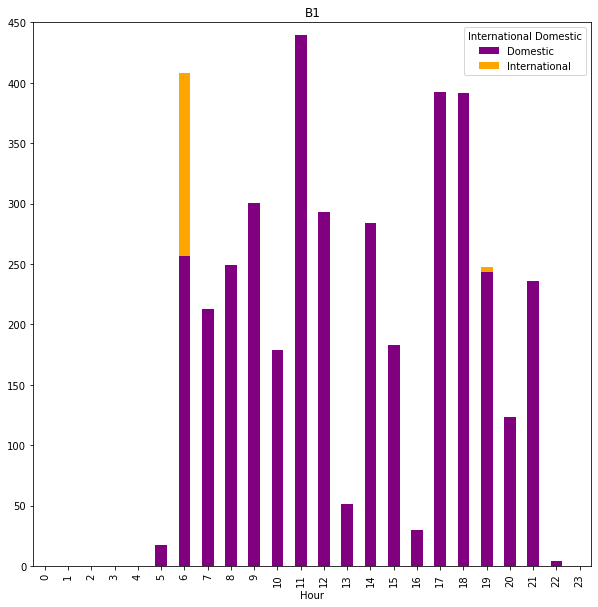

In [ ]:
b1.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B1')

The international flight in B1 is a daily flight to Cancun on Frontier. It usually departs from B1, but sometimes from B3.

Text(0.5, 1.0, 'B2')

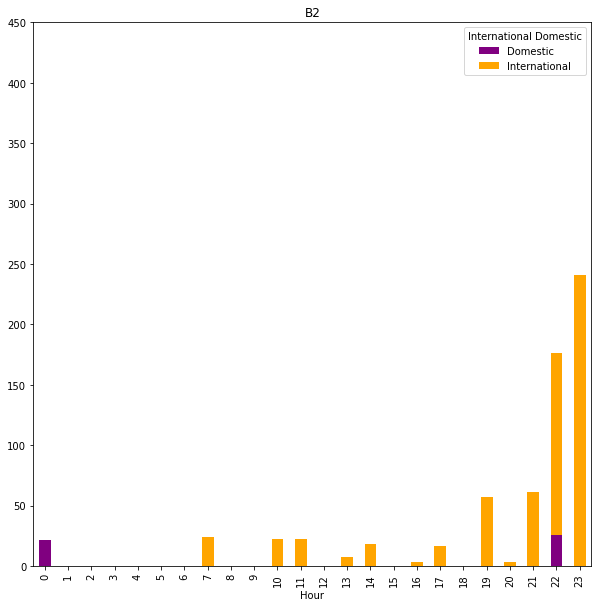

In [ ]:
b2.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B2')

Text(0.5, 1.0, 'B3')

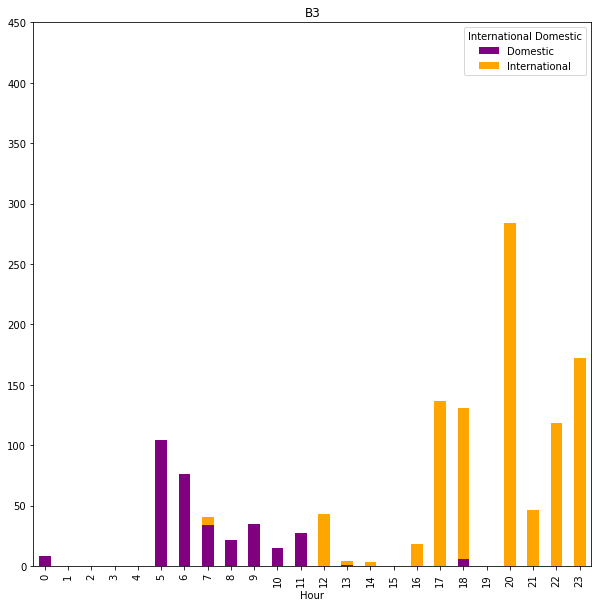

In [ ]:
b3.loc[:,'Estimated Passenger'].plot(kind='bar',stacked=True,figsize=(10,10), color = ['purple','orange'])
plt.ylim([0,450])
plt.title('B3')

In [ ]:
# For B1, what is the international flight at 6am?
fs9.loc[(fs9['Departure Concourse'] == 'B1') & (fs9['International Domestic'] == 'International'),:].head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11254,43,2021-09-01 06:14:00,B1,Morning,6,2021-09-01,2,Frontier Airlines,International,CUN,1546,186,152
11304,43,2021-09-02 06:14:00,B1,Morning,6,2021-09-02,3,Frontier Airlines,International,CUN,1546,186,152
11376,43,2021-09-03 06:48:00,B1,Morning,6,2021-09-03,4,Frontier Airlines,International,CUN,1546,186,152
11434,43,2021-09-04 06:14:00,B1,Morning,6,2021-09-04,5,Frontier Airlines,International,CUN,1546,186,152
11488,43,2021-09-05 06:48:00,B1,Morning,6,2021-09-05,6,Frontier Airlines,International,CUN,1546,186,152


In [ ]:
fs_con.loc[(fs_con['Operating Airline Name'] == 'Frontier Airlines') & (fs_con['Flight No'] == 43) & (fs_con['Flight Date'] == '2021-09-09'),:].head()

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,Aircraft Id,Aircraft Code,Airline Id,ICAO Airline,Arriving from Airport Id,Departing to Airport Id,Dep Airport Code,Arr Airport Code,Context Airport Id,Non-Context Airport Id,State Id,Arr Terminal,Dep Terminal,Context Terminal,Flight Direction,Flight No,International Domestic,Mainline Low Cost,Service Type,Flight Type,Seats,Load Factor,Estimated Passenger,Flight Distance,Flight Duration,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
11720,309056308,2021-09-09,2021-09-09T09:16:00.000Z,2021-09-09T06:14:00.000Z,2021-09-09T06:14:00.000Z,1900-01-01T09:16:00.000Z,1900-01-01T06:14:00.000Z,2021090906,1900-01-01T06:14:00.000Z,1900-01-01T09:16:00.000Z,6394,320,1974,FFT,92,116,EWR,CUN,116,92,-1,4,B,B,Departure,43,International,NaN,J,All Passenger Flights,186,0.818251,152,1546,242,1,1,F9,Frontier Airlines,10,1974,1900-01-01T06:14:00.000Z,NaN,NaN,Concourse B-1


In [ ]:
fs_con.loc[(fs_con['Operating Airline Name'] == 'Frontier Airlines') & (fs_con['Flight No'] == 43),'Departure Concourse'].value_counts()

Concourse B-1    144
Concourse B-3     73
Hard Stand        11
Name: Departure Concourse, dtype: int64

In [ ]:
fs9.head()

,Flight No,Dept_Date_Time,Departure Concourse,Time Category,Hour,Flight Date,DOW,Operating Airline Name,International Domestic,Arr Airport Code,Flight Distance,Seats,Estimated Passenger
11234,101,2021-09-01 19:00:00,B2,Evening,19,2021-09-01,2,La Compagnie,International,ORY,3648,76,62
11235,4870,2021-09-01 18:05:00,B1,Evening,18,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11236,4987,2021-09-01 10:50:00,B1,Morning,10,2021-09-01,2,Endeavor Air,Domestic,CVG,569,76,37
11237,4857,2021-09-01 12:59:00,B1,Morning,12,2021-09-01,2,Endeavor Air,Domestic,DTW,488,76,37
11238,1529,2021-09-01 06:10:00,B1,Morning,6,2021-09-01,2,Delta Air Lines,Domestic,DTW,488,180,91


In [ ]:
fs9_d = fs9[['Departure Concourse','Operating Airline Name','Estimated Passenger']].groupby(['Departure Concourse','Operating Airline Name'],as_index=False).sum()
fs9_d

,Departure Concourse,Operating Airline Name,Estimated Passenger
0,B1,Delta Air Lines,19313
1,B1,Endeavor Air,3907
2,B1,Frontier Airlines,25495
3,B1,La Compagnie,124
4,B1,SkyWest Airlines,2516
5,B1,Spirit Airlines,69946
6,B2,Emirates,7223
7,B2,Ethiopian Airlines,1717
8,B2,French Bee,4521
9,B2,Frontier Airlines,1397


In [ ]:
fs9_d[fs9_d['Departure Concourse'] == 'B3']

,Departure Concourse,Operating Airline Name,Estimated Passenger
12,B3,Air India,1485
13,B3,Allegiant Air,1680
14,B3,Austrian Airlines,720
15,B3,El Al Israel Airlines,639
16,B3,Emirates,1112
17,B3,Frontier Airlines,635
18,B3,Icelandair,4317
19,B3,LOT Polish Airlines,3560
20,B3,Lufthansa German Airlines,6162
21,B3,SAS - Scandinavian Airlines Sys.,1392


In [ ]:
fs9_e = fs9_d.pivot(index=['Operating Airline Name'],columns = 'Departure Concourse',values = 'Estimated Passenger').fillna(0)
fs9_e

Departure Concourse,B1,B2,B3
Operating Airline Name,,,
Air India,0.0,0.0,1485.0
Allegiant Air,0.0,0.0,1680.0
Austrian Airlines,0.0,0.0,720.0
Delta Air Lines,19313.0,0.0,0.0
El Al Israel Airlines,0.0,0.0,639.0
Emirates,0.0,7223.0,1112.0
Endeavor Air,3907.0,0.0,0.0
Ethiopian Airlines,0.0,1717.0,0.0
French Bee,0.0,4521.0,0.0


In [ ]:
fs9_e.to_csv('airlinexconcourse.csv')

In [ ]:
fs9_f = fs9[['Departure Concourse','Arr Airport Code','Flight No']].groupby(['Departure Concourse','Arr Airport Code'],as_index=False).count().sort_values(['Departure Concourse','Flight No'],ascending=False)

In [ ]:
fs9_f[fs9_f['Departure Concourse'] == 'B3']

,Departure Concourse,Arr Airport Code,Flight No
41,B3,LIS,48
37,B3,FRA,30
32,B3,CPH,26
39,B3,KEF,24
45,B3,MUC,21
56,B3,ZRH,18
42,B3,MCO,17
36,B3,FLL,16
44,B3,MSP,16
34,B3,DEL,15


In [ ]:
fs9['Operating Airline Name'].value_counts()

Spirit Airlines                           511
Delta Air Lines                           223
Frontier Airlines                         206
Endeavor Air                              106
Porter Airlines                            76
SkyWest Airlines                           68
Lufthansa German Airlines                  56
Tap-Portuguese Airlines (TAP Portugal)     55
SAS - Scandinavian Airlines Sys.           43
Allegiant Air                              31
Emirates                                   30
Icelandair                                 24
La Compagnie                               21
Swiss International Airlines               18
Ethiopian Airlines                         17
LOT Polish Airlines                        17
Sun Country Airlines                       16
Air India                                  15
French Bee                                 14
Austrian Airlines                           6
El Al Israel Airlines                       3
Name: Operating Airline Name, dtyp

In [ ]:
fs9.loc[(fs9['Departure Concourse'] == 'B3') & (fs9['Operating Airline Name'] == 'Spirit Airlines'),'Arr Airport Code'].value_counts()

MCO    17
FLL    16
ATL     9
LAS     1
MYR     1
Name: Arr Airport Code, dtype: int64

## Temp